# **Non-Linear Regression Boston Dataset**

Concepts: 

* Linear Regression: 3 Methods
* Backward Eliminiation
* Train-Test-Split vs. K-fold Cross Validation
* Regularization (using K-fold CV): Lasso and Ridge
* Polynomial Regression   
* Bias Error vs. Variance Error
* Which model to chose between BE vs. VE?








In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('bos_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


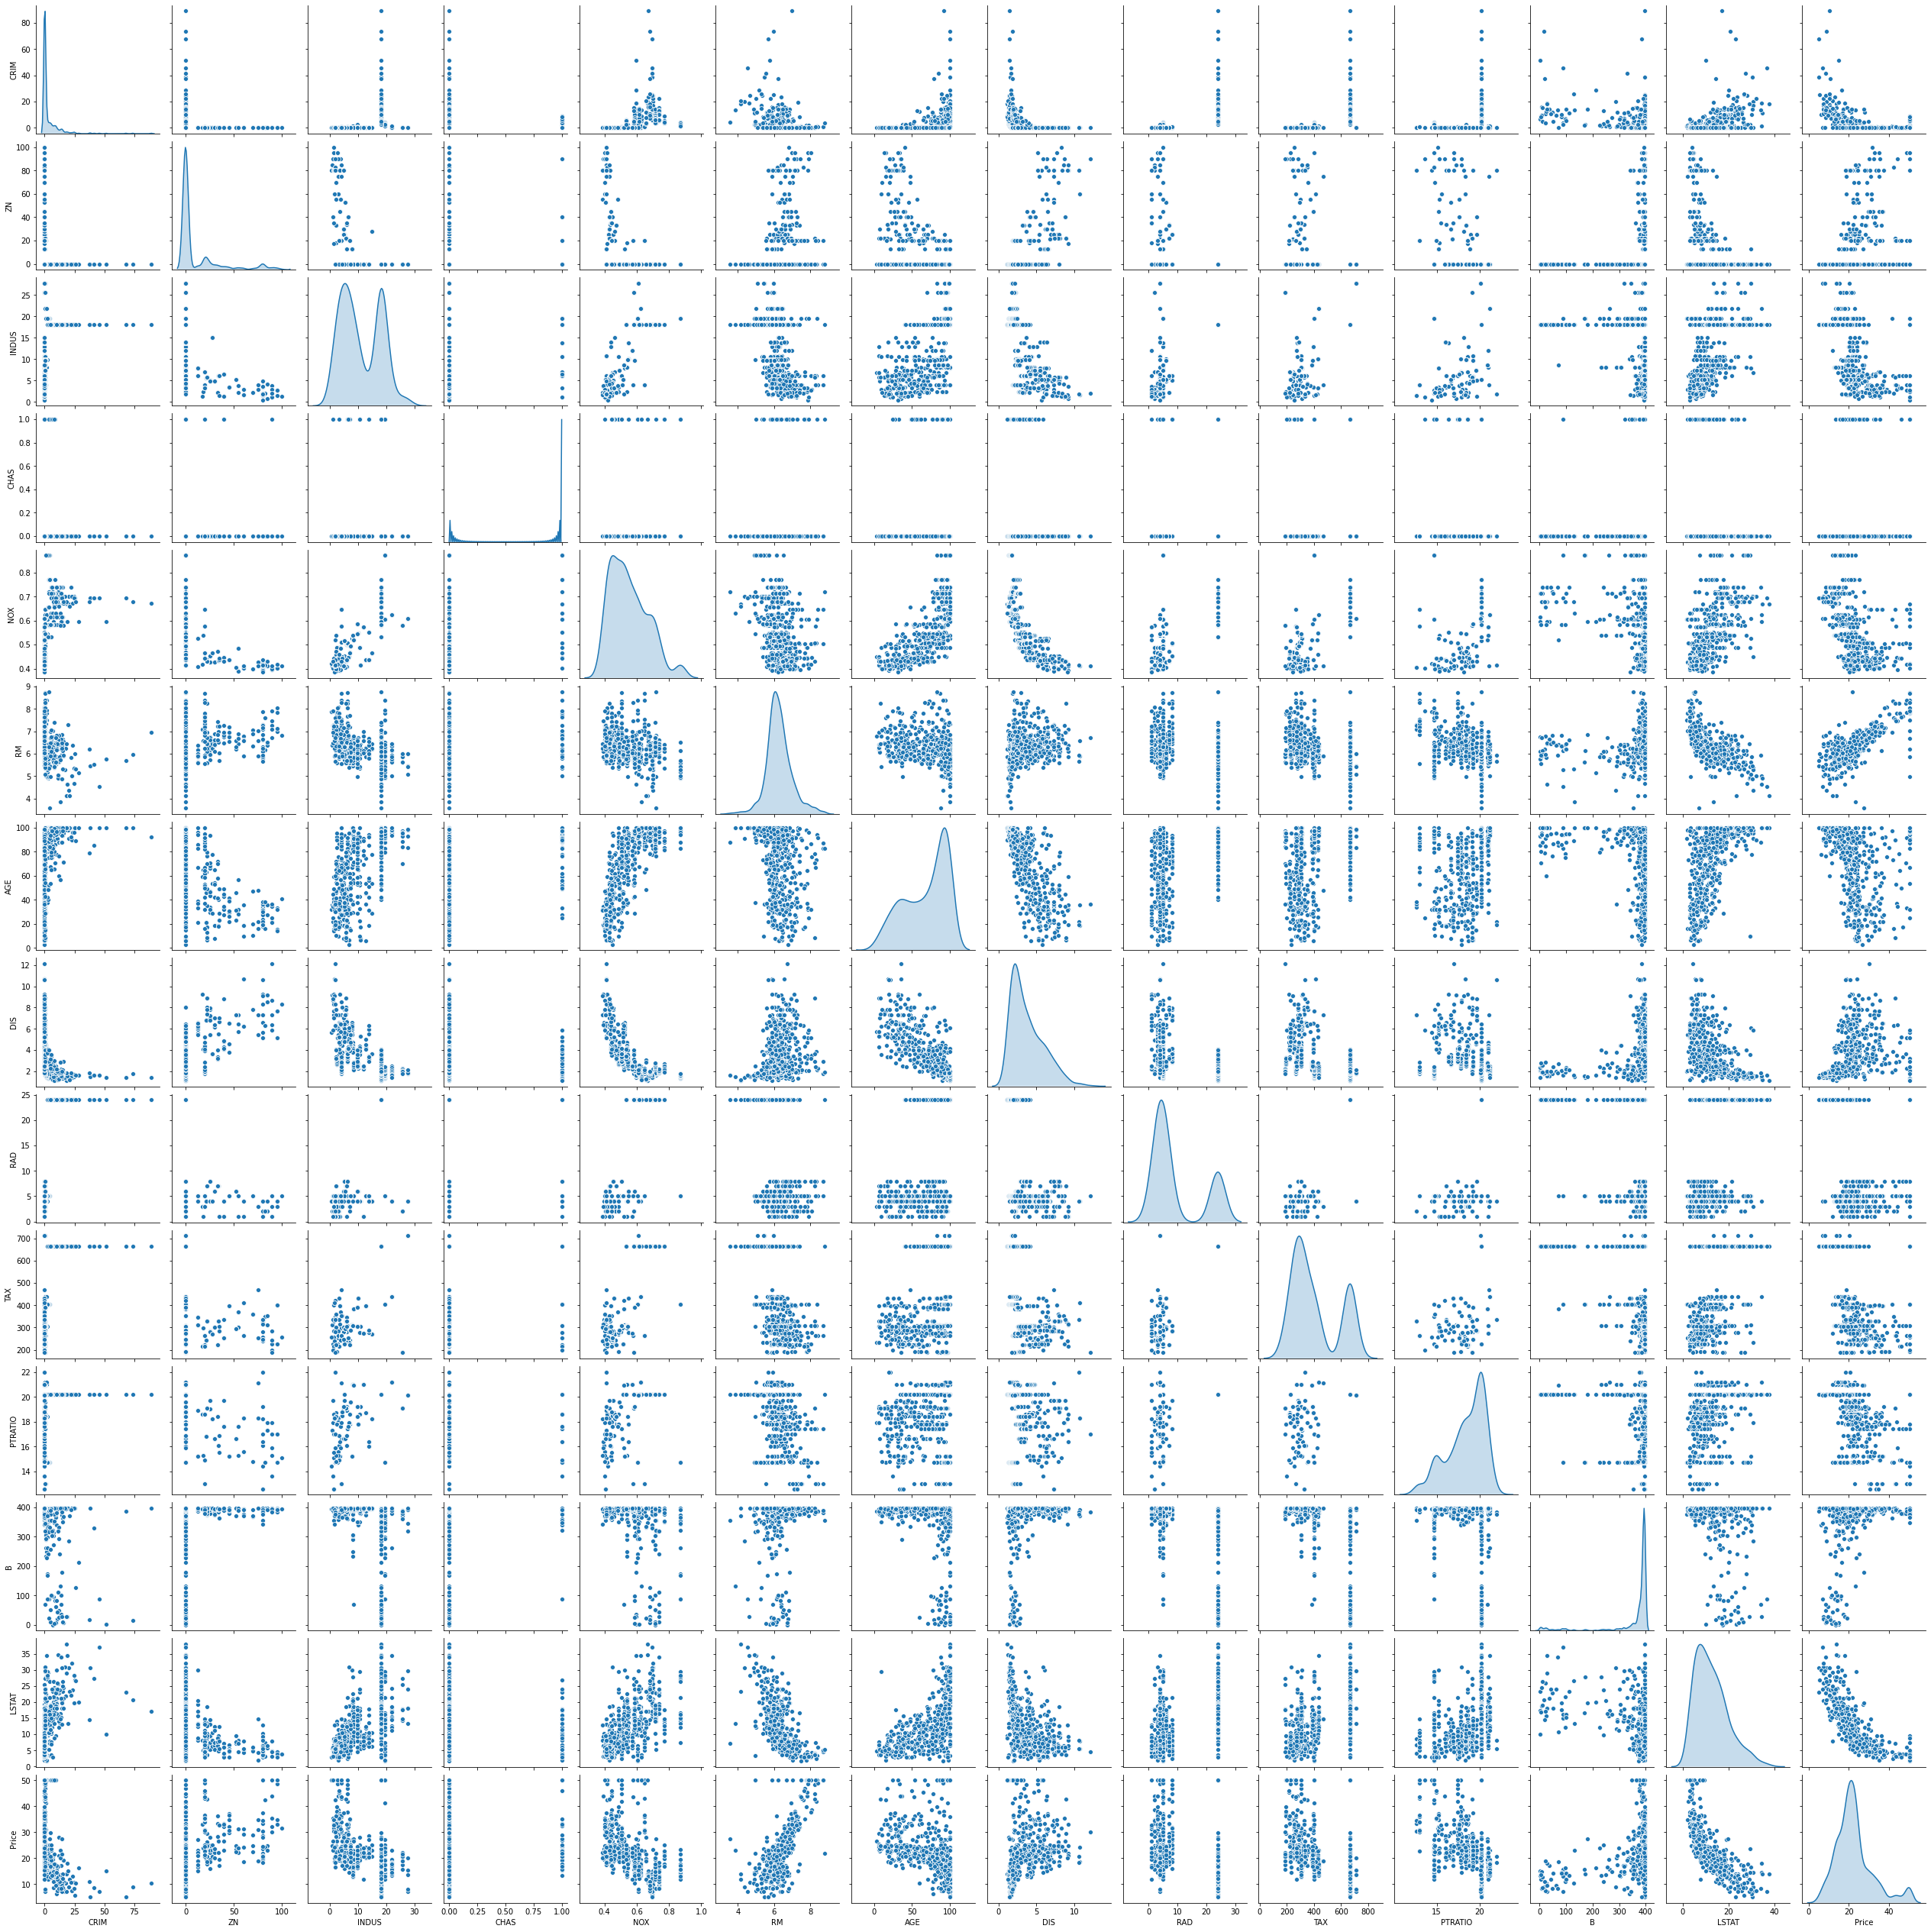

In [ ]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

In [5]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [6]:
from scipy.stats import levene

In [7]:
for cols in df.columns[:-1]:
  print(cols, levene(df['Price'], df[cols])[1])

CRIM 5.058441209116198e-10
ZN 8.133651361911733e-06
INDUS 0.1457225947720034
CHAS 7.087575216458403e-88
NOX 1.9551701808981249e-87
RM 4.570687431842767e-78
AGE 2.4747442349124064e-82
DIS 1.2366032641993388e-52
RAD 0.15775679338003074
TAX 6.548989933002059e-93
PTRATIO 4.3496792236604184e-51
B 1.9614461422071214e-15
LSTAT 0.012493298329754982


In [ ]:
from scipy.stats import stats

In [ ]:
ch_gb = df.groupby('CHAS')

ch_0 = ch_gb.get_group(0)
ch_1 = ch_gb.get_group(1)


In [ ]:
stats.ttest_ind(ch_0['Price'], ch_1['Price'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Scikit Learn Method**

In [ ]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [ ]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LR.intercept_

36.45948838509004

In [ ]:
LR.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

## **Statsmodel ols Method 1**

In [ ]:
ml = smf.ols('Price ~ CRIM + ZN+ INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', df).fit()

In [ ]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        22:49:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This method is very cumbersome and we have write down each and every variable we want to include in the model. This approach is simliar to 'R' Language. This method is a good manual method as we can add one variable at a time and see the impact. However, as the variables keep on increasing it can be get cumbersome for that reason the second method (Statsmodels OLS with constant) is  recommened.

## **Statsmodel OLS Method 2** (Add Constant)

In [ ]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [ ]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        22:49:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

According to the summary INDUS and AGE have p-value > 0.05. So, these features need to be removed and run the model again. 

## Backward Elimination:

We can automate the process and see the variables which have p-value < 0.05.

In [ ]:
#Backward Elimination

cols = list(x.columns)                                         # Putting all the columns in a list
pmax = 1                                                       # Setting the Highest value for p-value as 1
while (len(cols)>0):                                           # While length of column > 0 the loop will run
    p= []                                                      # p is an empty list
    X = x[cols]                                                # We are taking all the columns in x
    xc = sm.add_constant(X)                                    # We are adding the constant to X
    model = sm.OLS(y,xc).fit()                                 # Fitted the OLS model with all the featues
    p = pd.Series(model.pvalues.values[1:],index = cols)       # Creating a series with all the p-values (values) ([1:0] because to not include the p-value of constant) with column names as indexes
    pmax = max(p)                                              # pmax will store the value with the maximum p-values of all the p-values
    feature_with_p_max = p.idxmax()                            # p.idxmax() will return the index of the corresponding value
    if(pmax>0.05):                                             # if p-value stored in pmax > 0.05
        cols.remove(feature_with_p_max)                        # that column is removed (if p-value > 0.05), now len of column is reduced by 1 the whole process will repeat
    else:                                                      # It will keep on doing till the highest p-value is less than 0.05
        break                                                  # Once it found the nth highest one with the p-value < 0.05 automatically others after that have p-value < 0.05 and loop breaks
selected_features_BE = cols                                    # Collecting all features which have p-value < 0.05
print(selected_features_BE)                                    # Printing all the features it collected in selected_features_BE 

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
print(len(cols)) #Backward elimination has already removed the insignificant features and stored them in 'cols', df[cols] will contain only the relevant feature and data

11


## Train-Test-Split (TTS) vs. K-Fold Cross Validation (CV)

TTS: This is a point estimate, if you do the process and calculate RMSE you will get one value

CV: This is a range estimate, it will do multiple TTS and gives RMSE as a range (PREFERRED METHOD)

Train-Test-Split (Point Estimate)

In [ ]:
x_final = df[cols]
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.3  ,random_state=0)

In [ ]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

27.04657009592705

In [ ]:
rmse = np.sqrt(mse)
rmse

5.200631701623087

RMSE: 5.200631701623087,

Using train-test-split which is point esimate, the model predicted RMSE of 5.20. 
The model is predicting an average error of 5.20. Since the target variable is given in scale of 1000. That means the model is predicting with the average error of,  5.20 * 1000 = $5200. 


K-Fold Cross Validation with n-splits as 5

In [ ]:
x_final = df[cols]
y = df['Price']

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([LR], ['MVLR']):
  rmse = []
  for train,test in kf.split(x_final,y):
    x_train, x_test = x_final.iloc[train,:], x_final.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[5.781366335656938, 4.285510956964728, 4.605684310794306, 5.401332289086714, 4.069307989432014]


In [ ]:
np.mean(rmse)

4.82864037638694

Mean of 5 RMSE calculated in the 5 folds is 4.828 is more accurate than 5.2 calculated in train-test-split. 

# Regularization

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
m1 = LinearRegression()
m2 = Ridge(alpha = 0.5, normalize= True)
m3 = Lasso(alpha = 0.1, normalize= True)
# m4 = ElasticNet(alpha = 0.01, l1_ratio= 0.919, normalize= True)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([m1,m2,m3], ['MVLR', 'Ridge', 'Lasso']):
  rmse = []
  for train,test in kf.split(x_final,y):
    x_train, x_test = x_final.iloc[train,:], x_final.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)
  print('Cross_Validated_RMSE_Score: %0.03f (+/- %0.5f) [%s]' % 
        (np.mean(rmse), np.var(rmse, ddof = 1), name)) 

[5.781366335656938, 4.285510956964728, 4.605684310794306, 5.401332289086714, 4.069307989432014]
Cross_Validated_RMSE_Score: 4.829 (+/- 0.53924) [MVLR]
[6.394160153276113, 4.379440737253133, 4.530493025378238, 5.873344606142781, 4.908868148817135]
Cross_Validated_RMSE_Score: 5.217 (+/- 0.77106) [Ridge]
[6.433337022479433, 5.387344999598299, 4.998317048923148, 6.370455450497028, 6.183526927165738]
Cross_Validated_RMSE_Score: 5.875 (+/- 0.41470) [Lasso]


MVLR: BE = 4.829, VE = 0.539

Ridge (alpha = 0.5): BE = 5.217, VE = 0.77106

Lasso (alpha = 0.1): BE = 5.875, VE = 0.414

In [ ]:
rmse_lr = np.array([5.781366335656938, 4.285510956964728, 4.605684310794306, 5.401332289086714, 4.069307989432014])
rmse_ridge = np.array([6.394160153276113, 4.379440737253133, 4.530493025378238, 5.873344606142781, 4.908868148817135])
rmse_lasso = np.array([6.433337022479433, 5.387344999598299, 4.998317048923148, 6.370455450497028, 6.183526927165738])

In [ ]:
print('LR BE:' , rmse_lr.mean(), 'LR VE:', rmse_lr.var(ddof = 1))

LR BE: 4.82864037638694 LR VE: 0.539236856910946


In [ ]:
print('Ridge BE:' , rmse_ridge.mean(), 'Ridge VE:', rmse_ridge.var(ddof = 1))

Ridge BE: 5.21726133417348 Ridge VE: 0.7710591273816981


In [ ]:
print('Lasso BE:' , rmse_lasso.mean(), 'Lasso VE:', rmse_lasso.var(ddof = 1))

Lasso BE: 5.874596289732729 Lasso VE: 0.4146961950251114


Run K-fold with MVLR, Ridge and Lasso models

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([m1,m2,m3], ['MVLR', 'Ridge', 'Lasso']):
  rmse = []
  for train,test in kf.split(x_final,y):
    x_train, x_test = x_final.iloc[train,:], x_final.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    print(model.coef_)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[-1.19265889e-01  4.51412980e-02  2.34282671e+00 -1.62978884e+01
  3.68549285e+00 -1.37731203e+00  2.43212756e-01 -1.08465147e-02
 -1.04568509e+00  8.03588534e-03 -4.96639689e-01]
[-1.03102190e-01  5.36299477e-02  2.84184372e+00 -1.86873163e+01
  3.50848063e+00 -1.66421607e+00  3.07158134e-01 -1.11096926e-02
 -9.67555121e-01  7.76653207e-03 -5.67978459e-01]
[-1.18646711e-01  3.69036523e-02  4.07677646e+00 -1.72184735e+01
  4.28852639e+00 -1.48933762e+00  3.18776434e-01 -1.15005455e-02
 -9.37384937e-01  1.16096832e-02 -5.12612986e-01]
[-7.32554972e-02  4.85575609e-02  2.51121193e+00 -1.65579354e+01
  4.30357172e+00 -1.45887599e+00  2.67283552e-01 -1.09615756e-02
 -8.96559618e-01  1.10079878e-02 -4.85790441e-01]
[-1.10543050e-01  4.08566139e-02  1.96072493e+00 -1.73073657e+01
  3.30668724e+00 -1.41212794e+00  3.63755623e-01 -1.51427373e-02
 -8.87315770e-01  8.82807704e-03 -5.46656958e-01]
[5.781366335656938, 4.285510956964728, 4.605684310794306, 5.401332289086714, 4.069307989432014]
[-7.

### Quardratic Regression Model

Degree = 2

First try with one variable (LSTAT):

Y = B0 + B1`*`LSTAT + B2`*`(LSTAT)^2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[['LSTAT']] #Lower status of population (density)


In [ ]:
#Quadratic Regression with only one feature

qr  = PolynomialFeatures(degree= 2)
x_qr = qr.fit_transform(X)

In [ ]:
type(x_qr)

numpy.ndarray

In [ ]:
x_qr_df = pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436
4,1.0,5.33,28.4089


Column 0 = LSTAT ^ 0

Column 1 = LSTAT ^ 1

Column 2 = LSTAT ^ 2

In [ ]:
x_qr_df = x_qr_df.drop(0,axis = 1)

In [ ]:
x_qr_df.head(3)

,1,2
0,4.98,24.8004
1,9.14,83.5396
2,4.03,16.2409


In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([LR], ['Quadractic_Regression']):
  rmse = []
  for train,test in kf.split(x_qr_df,y):
    x_train, x_test = x_qr_df.iloc[train,:], x_qr_df.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[6.232725620601888, 5.16920694548939, 4.8134483167541395, 5.322775656375261, 5.959152434168141]


In [ ]:
print('Bias Error of Quadratic Regression:', np.mean(rmse))
print('Variance Error of Quadratic Regression', np.var(rmse, ddof= 1))

Bias Error of Quadratic Regression: 5.499461794677764
Variance Error of Quadratic Regression 0.33997301780437766


MVLR: BE = 4.829, VE = 0.539

Ridge (alpha = 0.5): BE = 5.217, VE = 0.77106

Lasso (alpha = 0.1): BE = 5.875, VE = 0.414

Quad Reg (only LSTAT): BE = 5.49, VE = 0.339

Conclusion: Upto the models we ran so far, we can conclude that Multi-Variate Linear Regression (MVLR) model is best in terms of Bias Error and Quad Regression is best in terms of Variance Error. Also, if you observe the bias error for MLVR is 4.8 and Quad Reg (only one variable LSTAT) has increased to 5.49 because the model is only being trained with only ONE variable.  

### **Polynomial Features**

degree = 3 or above


In [ ]:
#LSTAT with 3rd Order

X = df[['LSTAT']]


#Equation: Y = B0 + B1*LSTAT + B2*(LSTAT)^2 + B3*(LSTAT)^3
#Polynomial Regression with only one feature

pr  = PolynomialFeatures(degree= 3)
x_pr = qr.fit_transform(X)

In [ ]:
x_pr_df = pd.DataFrame(x_pr)
x_pr_df.head()

,0,1,2
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436
4,1.0,5.33,28.4089


In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([LR], ['Polynomial_Regression']):
  rmse = []
  for train,test in kf.split(x_pr_df,y):
    x_train, x_test = x_pr_df.iloc[train,:], x_pr_df.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)
  print('Cross_Validated_RMSE_Score: %0.03f (+/- %0.5f) [%s]' % 
        (np.mean(rmse), np.var(rmse, ddof = 1), name)) 

[6.2327256206018875, 5.169206945489392, 4.81344831675414, 5.322775656375267, 5.959152434168137]
Cross_Validated_RMSE_Score: 5.499 (+/- 0.33997) [Polynomial_Regression]


As you did poly regression with degree = 3 i.e. 3rd order bias error has decreased but the variance error has increased. As you increase the order the bias error will decrease and the variance error will keep on increasing. 

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


From the correlation matrix we know the highest correlated variable with target (price) is LSTAT and second most correlated variable is PTRATIO. Now let's do the analysis with LSTAT (Percentage of Lower status of the population) and PTRATIO (pupil-teacher ratio in schools by town). 

Quadractic and Polynomial Regression with multiple variables

2 variables: LSTAT and PTRATIO

Equation: Y = B0 + B1`*`LSTAT + B2`*`(LSTAT)^2 + B3`*`PTRATIO + B4`*`(PTRATIO)^2

Equation (power = 3): Y = B0 + B1`*`LSTAT + B2`*`(LSTAT)^2 + B3`*`(LSTAT)^3 + B4`*`(PTRATIO) + B5`*`(PTRATIO)^2 + B6`*`(PTRATIO)^3 


In [ ]:
#Quadractic Regression with 2 variables

X = df[['LSTAT', 'PTRATIO']]

In [ ]:
qr  = PolynomialFeatures(degree= 2)
x_qr = qr.fit_transform(X)

In [ ]:
x_qr_df = pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5
0,1.0,4.98,15.3,24.8004,76.194,234.09
1,1.0,9.14,17.8,83.5396,162.692,316.84
2,1.0,4.03,17.8,16.2409,71.734,316.84
3,1.0,2.94,18.7,8.6436,54.978,349.69
4,1.0,5.33,18.7,28.4089,99.671,349.69


In [ ]:
#x_qr_df = x_qr_df.drop(0,axis = 1)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state=0)
for model, name in zip([LR], ['Quadractic_Regression']):
  rmse = []
  for train,test in kf.split(x_qr_df,y):
    x_train, x_test = x_qr_df.iloc[train,:], x_qr_df.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
  print(rmse)

[6.675288365946331, 4.6880661102247245, 4.3834080404492415, 5.147355270569143, 5.2242410005910465]


In [ ]:
print('Bias Error of Quadratic Regression:', np.mean(rmse))
print('Variance Error of Quadratic Regression', np.var(rmse, ddof= 1))

Bias Error of Quadratic Regression: 5.223671757556097
Variance Error of Quadratic Regression 0.7764829579293794


Bias error decreases at the COST of variance error. Variance error was 0.354 and now it is 0.77. That is a not a good tradeoff which means we should stop making the model more complex. This proves that LSTAT (which is percent of lower status individual) is VERY strong attribute to predict the price. This also tells us that individuals sampled in this dataset that price is highly sensitive to LSTAT and adding the other factor will disturbing the model.

### Which model to pick?

If we look at the models we have built so far:

* MVLR has low bias error (BE) and Quad (single variable - LSTAT) has low variance error (VE).

* We compute the difference [(MAX - MIN)/MAX] to determine which is best. 

**MVLR: BE (4.829) and VE (0.5329)**

**Quad(LSTAT): BE (5.49) and VE (0.339)**


Compute(BE) difference: (5.49 - 4.829)/5.49 = 0.1204 = 12.04%

Computer(VE) difference: (0.5329 - 0.339)/0.5329 = 0.37 = 37%

* Since the difference in VE (37%) > BE (12%), we can conclude that we are going in favor of a less variance error and pick Quadratic Regression with LSTAT as a good pick for the model. In other words, we are willing to forego 12% of bias error for decreasing variance error by 37% which is being achieved with the quadratic model.